In [1]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import math
import numpy.linalg as LA

%matplotlib inline

def load_mnist(dataset="training", selecteddigits=range(10),  path=r'C:\Users\Greentea\Desktop\ucsc\ML\hw\03\train-images-idx3-ubyte_1'):
    # Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '\\' + 'train-images.idx3-ubyte'
        fname_labels = path + '\\' + 'train-labels.idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '\\' + 't10k-images.idx3-ubyte'
        fname_labels = path + '\\' + 't10k-labels.idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    # Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata = array("B", labelsfileobject.read())
    labelsfileobject.close()

    # Find indices of selected digits
    indices = [k for k in range(size) if labelsdata[k] in selecteddigits]
    N = len(indices)

    # Create empty arrays for X and T
    X = np.zeros((N, rows * cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)

    for i in range(N):
        X[i] = digitsdata[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]
        T[i] = labelsdata[indices[i]]
    return X, T


def vectortoimg(v, show=True):
    plt.imshow(v.reshape(28, 28), interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()


Checking multiple training vectors by plotting images.
Be patient:


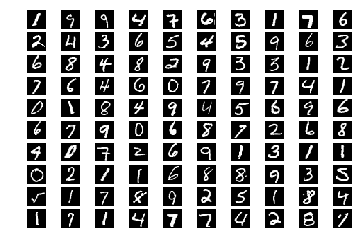

In [2]:
X, T = load_mnist(dataset="training", selecteddigits=range(0, 10))
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows = 10
ncols = 10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row * ncols + col + 1)
        vectortoimg(X[np.random.randint(len(T))], show=False)
plt.show()

T_name= np.unique(T)
TT = np.zeros(len(T))  # pseudo T for looping through XX[TT==1]
for i, b in enumerate(T):
    TT[i] = b


In [3]:
def cal_prob(T_predict,TT):
    count1=0
    for i in range(TT.shape[0]):
            if TT[i] == T_predict[i]: 
                count1 += 1
#     print(count1/TT.shape[0])
    return (count1/TT.shape[0])

In [4]:
# LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd

reduced_data_pca_n=[]
lr_n=[]
lr_fit_n=[]
T_out_lr=[]
prob_lr=[]
for i in range(0,15):
    reduced_data_pca_n.append(PCA(n_components=i+1,random_state=42).fit_transform(X))
    lr_n.append(LogisticRegression())
    lr_fit_n.append(lr_n[i].fit(reduced_data_pca_n[i],TT))
    T_out_lr.append(lr_n[i].predict(reduced_data_pca_n[i]))
    prob_lr.append(cal_prob(T_out_lr[i],TT))
    print("PCA "+ str(i+1)+" dim")
    print("Correct rate :" + str(prob_lr[i]))

PCA 1 dim
Correct rate :0.3022166666666667
PCA 2 dim
Correct rate :0.43348333333333333
PCA 3 dim
Correct rate :0.4502333333333333
PCA 4 dim
Correct rate :0.5609
PCA 5 dim
Correct rate :0.6434
PCA 6 dim
Correct rate :0.7051333333333333
PCA 7 dim
Correct rate :0.7318833333333333
PCA 8 dim
Correct rate :0.7604333333333333
PCA 9 dim
Correct rate :0.7653666666666666
PCA 10 dim
Correct rate :0.77655
PCA 11 dim
Correct rate :0.7805333333333333
PCA 12 dim
Correct rate :0.7975
PCA 13 dim
Correct rate :0.80785
PCA 14 dim
Correct rate :0.8129833333333333
PCA 15 dim
Correct rate :0.8166333333333333


In [5]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb_n = []
gnb_fit_n=[]
#reduced_data_pca_n=[]
T_out_gnb=[]
prob_gnb=[]
for i in range(0,15):
    
    #reduced_data_pca_n.append(PCA(n_components=i+1,random_state=42).fit_transform(X))
    #already get pca list in previouse part.
    
    gnb_n.append(GaussianNB())
    gnb_fit_n.append(gnb_n[i].fit(reduced_data_pca_n[i],TT))
    T_out_gnb.append(gnb_fit_n[i].predict(reduced_data_pca_n[i]))
    prob_gnb.append(cal_prob(T_out_gnb[i],TT))
    print("PCA "+ str(i+1)+" dim")
    print("Correct rate :" + str(prob_gnb[i]))

PCA 1 dim
Correct rate :0.3042666666666667
PCA 2 dim
Correct rate :0.43948333333333334
PCA 3 dim
Correct rate :0.45971666666666666
PCA 4 dim
Correct rate :0.5633
PCA 5 dim
Correct rate :0.6454
PCA 6 dim
Correct rate :0.7012166666666667
PCA 7 dim
Correct rate :0.72465
PCA 8 dim
Correct rate :0.7585333333333333
PCA 9 dim
Correct rate :0.7600666666666667
PCA 10 dim
Correct rate :0.7703333333333333
PCA 11 dim
Correct rate :0.7742166666666667
PCA 12 dim
Correct rate :0.7873666666666667
PCA 13 dim
Correct rate :0.7988833333333333
PCA 14 dim
Correct rate :0.8044
PCA 15 dim
Correct rate :0.80815


In [6]:
#Perceptron
from sklearn.linear_model import Perceptron

Perc_n = []
Perc_fit_n=[]
#reduced_data_pca_n=[]
T_out_Perc=[]
prob_Perc=[]
for i in range(0,15):
    
    #reduced_data_pca_n.append(PCA(n_components=i+1,random_state=42).fit_transform(X))
    #already get pca list in previouse part.
    
    Perc_n.append(Perceptron())
    Perc_fit_n.append(Perc_n[i].fit(reduced_data_pca_n[i],TT))
    T_out_Perc.append(Perc_fit_n[i].predict(reduced_data_pca_n[i]))
    prob_Perc.append(cal_prob(T_out_Perc[i],TT))
    print("PCA "+ str(i+1)+" dim")
    print("Correct rate :" + str(prob_Perc[i]))

C:\Users\Greentea\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PCA 1 dim
Correct rate :0.16983333333333334
PCA 2 dim
Correct rate :0.19758333333333333
PCA 3 dim
Correct rate :0.20628333333333335
PCA 4 dim
Correct rate :0.27055
PCA 5 dim
Correct rate :0.33886666666666665
PCA 6 dim
Correct rate :0.25635
PCA 7 dim
Correct rate :0.33018333333333333
PCA 8 dim
Correct rate :0.3258666666666667
PCA 9 dim
Correct rate :0.3836833333333333
PCA 10 dim
Correct rate :0.42105
PCA 11 dim
Correct rate :0.4074333333333333
PCA 12 dim
Correct rate :0.39595
PCA 13 dim
Correct rate :0.49861666666666665
PCA 14 dim
Correct rate :0.49975
PCA 15 dim
Correct rate :0.49838333333333334


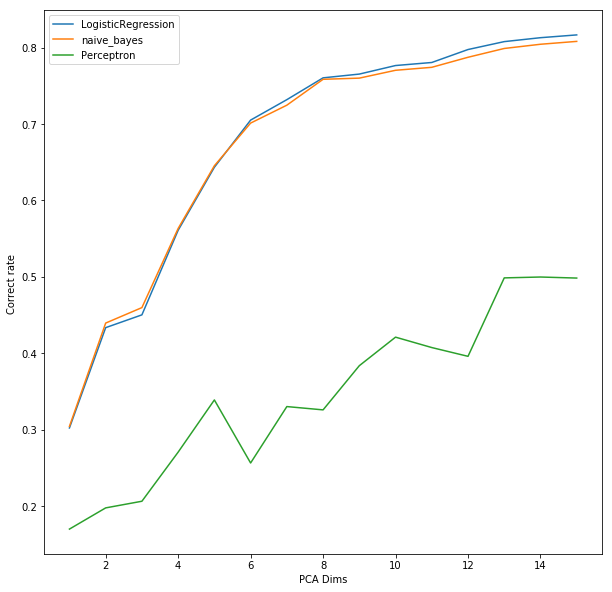

In [17]:
#comparison and plot
prob_all=[prob_lr,prob_gnb,prob_Perc]
label = ["LogisticRegression","naive_bayes","Perceptron"]
plt.figure(figsize=(10,10))
for i in range(len(prob_all)):
    plt.plot(range(1,16),prob_all[i], label=label[i])

plt.legend(loc="best")
plt.xlabel("PCA Dims")
plt.ylabel("Correct rate ")
plt.show()